
## Introduction to SciKit-Learn and Model Evaluation

In [1]:
# import packages
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rcParams['figure.dpi'] = 200
mpl.rcParams['font.size'] = 12 
import sklearn
from sklearn.linear_model import LogisticRegression
# needed for activity 2
from sklearn.model_selection import train_test_split
from sklearn import metrics

# import the data
df = pd.read_csv(r'C:\Users\Lappy\Data Science Projects with Python\00 data\ch01_cleaned_data.csv')

# which versions?
print('The Python version is {}.\n'.format(sys.version))
print('The Numpy version is {}.\n'.format(np.__version__))
print('The Pandas version is {}.\n'.format(pd.__version__))
print('The Matplotlib version is {}.\n'.format(mpl.__version__))
print('The Scikit-Learn version is {}.\n'.format(sklearn.__version__))


The Python version is 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)].

The Numpy version is 1.24.3.

The Pandas version is 2.0.3.

The Matplotlib version is 3.7.2.

The Scikit-Learn version is 1.3.0.



In [2]:
df['default payment next month'].mean()

0.2217971797179718

In [3]:
df.groupby('default payment next month')['ID'].count()

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

## Intro to Scikit-Learn

Switching to the 2nd edition because the version differnce in Scikit-Learn is quite large between 1st and 2nd ed. 

https://github.com/PacktPublishing/Data-Science-Projects-with-Python-Second-Ed/blob/main/Chapter02/Example_Scikit_Learn/Example_Scikit_Learn.ipynb

In [4]:
# create and examine a logistic regression object
my_lr = LogisticRegression()
my_lr

LogisticRegression()

## parameters of LogisticRegression() in sklearn

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html



In [5]:
my_new_lr = LogisticRegression(penalty='l2', dual=False,
                              tol=0.0001, C=1.0, fit_intercept=True,
                              intercept_scaling=1, class_weight=None,
                              random_state = None, solver='lbfgs',
                              max_iter=100, multi_class='auto',
                              verbose=0, warm_start=False,
                              n_jobs=None, l1_ratio=None)
my_new_lr

LogisticRegression()

In [6]:
# altering some parameters
my_new_lr.C = 0.1
my_new_lr.solver = 'liblinear'
my_new_lr

LogisticRegression(C=0.1, solver='liblinear')

In [7]:
X = df['EDUCATION'][0:10].values.reshape(-1,1)
X

array([[2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [3],
       [3]], dtype=int64)

In [8]:
y = df['default payment next month'][0:10].values
y

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [9]:
my_new_lr.fit(X,y)

LogisticRegression(C=0.1, solver='liblinear')

In [10]:
new_X = df['EDUCATION'][10:20].values.reshape(-1,1)
new_X

array([[3],
       [1],
       [2],
       [2],
       [1],
       [3],
       [1],
       [1],
       [1],
       [3]], dtype=int64)

In [11]:
my_new_lr.predict(new_X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [12]:
df['default payment next month'][10:20].values

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

# Activity 2

## logistic regression with a new feature and creating a precision-recall curve


In [13]:
# setting up the parameters of the logistic regression.
# todo: comment w/meanings

example_lr = LogisticRegression(C = 0.1,
                               class_weight = None, 
                               dual = False,
                               fit_intercept = True,
                               intercept_scaling = 1, 
                               max_iter = 100,
                               multi_class = 'auto',
                               n_jobs = None,
                               penalty = 'l2',
                               random_state = None,
                               solver = 'liblinear',
                               tol = 0.0001,
                               verbose = 0,
                               warm_start = False)

## Using `train_test_split`

 * Two inputs from the data: features `LIMIT_BAL`, and response `default payment next month`
 * `test_size` (x% for the training set, 1-x% for the training set is understood)
 * `random_state` is the random seed
 * there are four (4) X and y training, and X and y test sets

In [14]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
df['LIMIT_BAL'].values.reshape(-1,1), # first argument is features
df['default payment next month'].values, # second argument is the response
test_size = 0.2, # 20% test (and therefore 80% train)
random_state = 24) # random seed

Note that the test to train ratio is a 20/80 split.

In [15]:
X_train_2.shape

(21331, 1)

In [16]:
X_test_2.shape

(5333, 1)

In [18]:
Out[16][0]/(Out[15][0]+Out[16][0])

0.200007500750075

Note that the mean of the train and test sets are nearly identical.

In [19]:
np.mean(y_train_2)

0.223102526838873

In [20]:
np.mean(y_test_2)

0.21657603600225014

## Training and fitting steps

In [21]:
# this is the training step
example_lr.fit(X_train_2, y_train_2)

LogisticRegression(C=0.1, solver='liblinear')

# Difference between `predict` and `predict_proba`

> The `predict` function returns the prediction as True/False value, whereas `predict_proba` function returns probabilities, values between one and zero and this is the reason for the difference.
> AUC means "area under the curve" which is indeed different if the curve is a 0/1 step function or a curve made of continuous values.
> Let's imagine you have only one example, it should be classified as False. If your classifier yields the probability of 0.7 (`predict_proba`), the ROC-AUC value is 1.0-0.7=0.3. If you used `predict`, the prediction will be True = 1.0, so the ROC-AUC will be 1.0-1.0=0.0.

source
https://stackoverflow.com/a/56397922

In [22]:
# this is the fitting step
# predict_proba is used
y_test_2_pred_proba = example_lr.predict_proba(X_test_2)

## How accurate is our model?

Compare the predicted outcome with the testing data set outcomes

In [23]:
y_pred_2 = example_lr.predict(X_test_2) # predict is used here
is_correct = y_pred_2 == y_test_2
np.mean(is_correct) # the model is 78% accurate

0.7834239639977498

In [24]:
example_lr.score(X_test_2, y_test_2) # same accuracy reading as above (78%)

0.7834239639977498

In [25]:
metrics.accuracy_score(y_test_2, y_pred_2) # this uses the metrics library in sklearn
# and the accuracy agrees with the two methods above (78%)

0.7834239639977498

In [40]:
P = sum(y_test_2)
P

1155

In [43]:
# calculate true positives
TP = sum ((y_test_2 ==1) & (y_pred_2 ==1))
TP

0

In [44]:
# True Positive Rate
TPR = TP / P
TPR

0.0

In [46]:
# false negative
FN = sum ((y_test_2 == 1) & (y_pred_2 == 0))
FN

1155

In [47]:
# False negative rate
FNR = FN/P
FNR

1.0

## What does this mean?

The model is acting as a *majority class null model* where every positive sample was predicted negative. (None were correctly predicted.)

In [48]:
# Negatives
N = sum(y_test_2 == 0)
N

4178

In [50]:
# true negatives
TN = sum((y_test_2 ==0) & (y_pred_2 == 0))
TN

4178

In [53]:
# false positives
FP = sum((y_test_2 == 0) & (y_pred_2 ==1))
FP

0

In [60]:
# compute True Negative Rate and Falst Positive Rate in a single line of output
# for no real reason I added in line breaks using \ in the print command
TPR = TN/N
FPR = FP/N
print(\
      'The true negative rate is {} and the false positive rate is {}.'\
      .format(TPR,FPR)
     )

The true negative rate is 1.0 and the false positive rate is 0.0.


## Confusion matrix using scikit-learn

We've already computed the confusion matrix manually, let's do it in a single line using scikit-learn.

In [64]:
metrics.confusion_matrix(y_test_2,y_pred_2)

array([[4178,    0],
       [1155,    0]], dtype=int64)

## Vocabulary

 * **TPR** True Positive Rate, or Sensitivity, or Recall
 * **Precision** TP/(TP + FP)

In [65]:
# Look at the predictdd probabilities of our data
y_pred_2_proba = example_lr.predict_proba(X_test_2)
y_pred_2_proba

array([[0.74826924, 0.25173076],
       [0.584297  , 0.415703  ],
       [0.79604453, 0.20395547],
       ...,
       [0.584297  , 0.415703  ],
       [0.82721498, 0.17278502],
       [0.66393434, 0.33606566]])

In [68]:
prob_sum = np.sum(y_pred_2_proba,1)
prob_sum

array([1., 1., 1., ..., 1., 1., 1.])

In [71]:
prob_sum.shape

(5333,)

In [72]:
np.unique(prob_sum)

array([1.])

In [75]:
pos_proba = y_pred_2_proba[:,1]
pos_proba

array([0.25173076, 0.415703  , 0.20395547, ..., 0.415703  , 0.17278502,
       0.33606566])

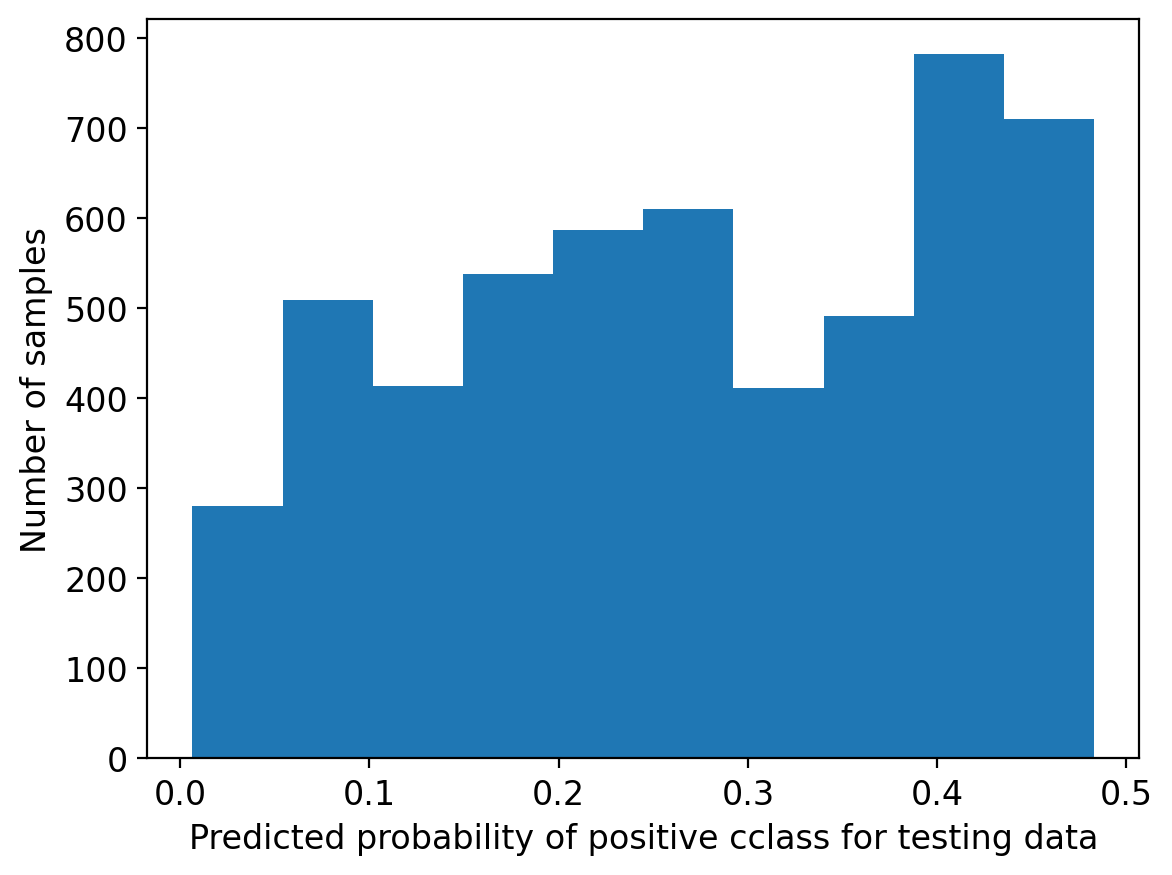

In [78]:
mpl.rcParams['font.size'] = 12
plt.hist(pos_proba)
plt.xlabel('Predicted probability of positive cclass for testing data')
plt.ylabel('Number of samples');

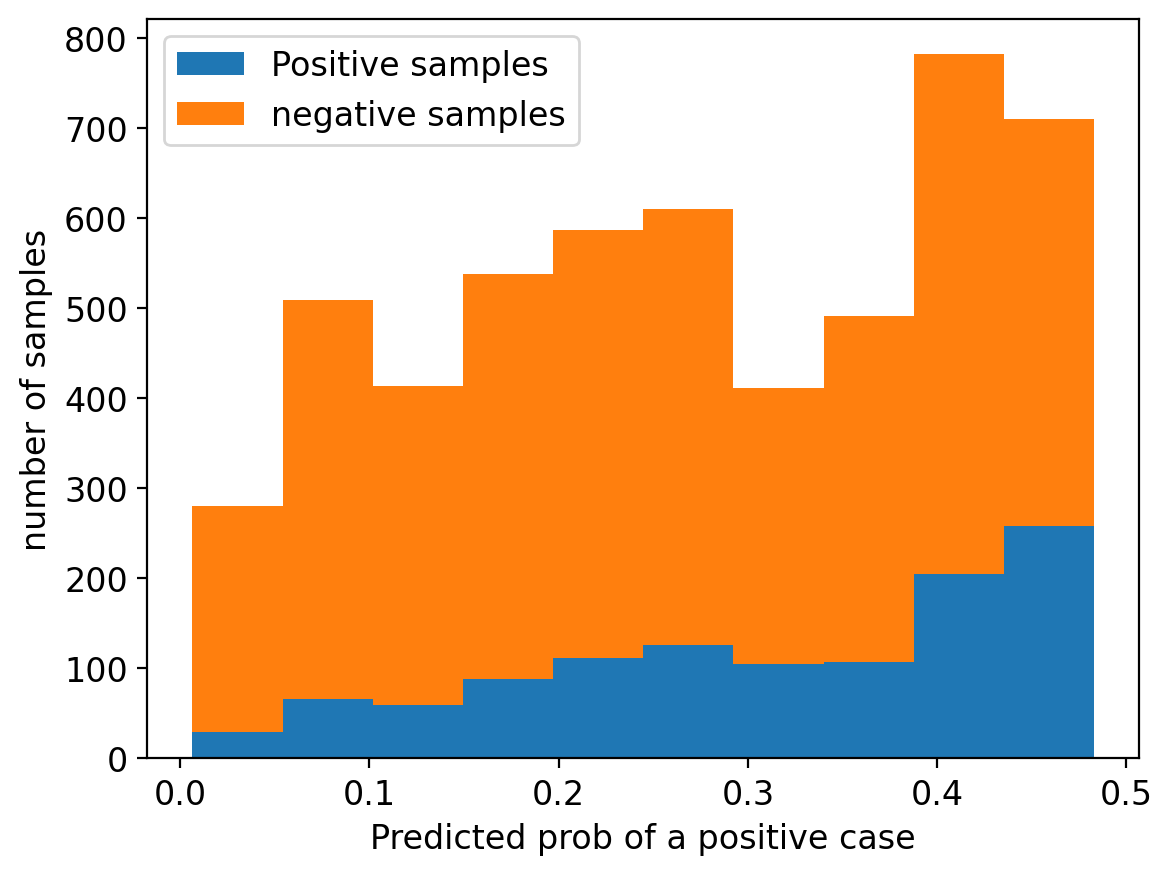

In [80]:
pos_sample_pos_proba = pos_proba[y_test_2 == 1]
neg_sample_pos_proba = pos_proba[y_test_2 == 0]
plt.hist(
    [pos_sample_pos_proba, 
     neg_sample_pos_proba], 
    histtype='barstacked')
plt.legend(['Positive samples', 'negative samples'])
plt.xlabel('Predicted prob of a positive case')
plt.ylabel('number of samples');

## Meaning of ROC AUC

### Receiver Operating Characteristic Curve

> The roc_auc_score function, denoted by ROC-AUC or AUROC, computes the area under the ROC curve. By doing so, the curve information is summarized in one number.

source
https://scikit-learn.org/stable/modules/model_evaluation.html#receiver-operating-characteristic-roc

> receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the performance of a binary classifier model (can be used for multi class classification as well) at varying threshold values.

> The ROC curve is the plot of the true positive rate (TPR) against the false positive rate (FPR) at each threshold setting. 

> The ROC curve is thus the sensitivity or recall as a function of false positive rate. 

Wikipedia
https://en.wikipedia.org/wiki/Receiver_operating_characteristic

In [26]:
metrics.roc_auc_score(y_test_2,y_test_2_pred_proba[:,1])

0.6201990844642832

 * FPR = False Positive Rate
 * TPR = True Positive Rate

In [27]:
fpr_2, tpr_2, thresholds_2 = metrics.roc_curve( y_test_2, y_test_2_pred_proba[:,1])

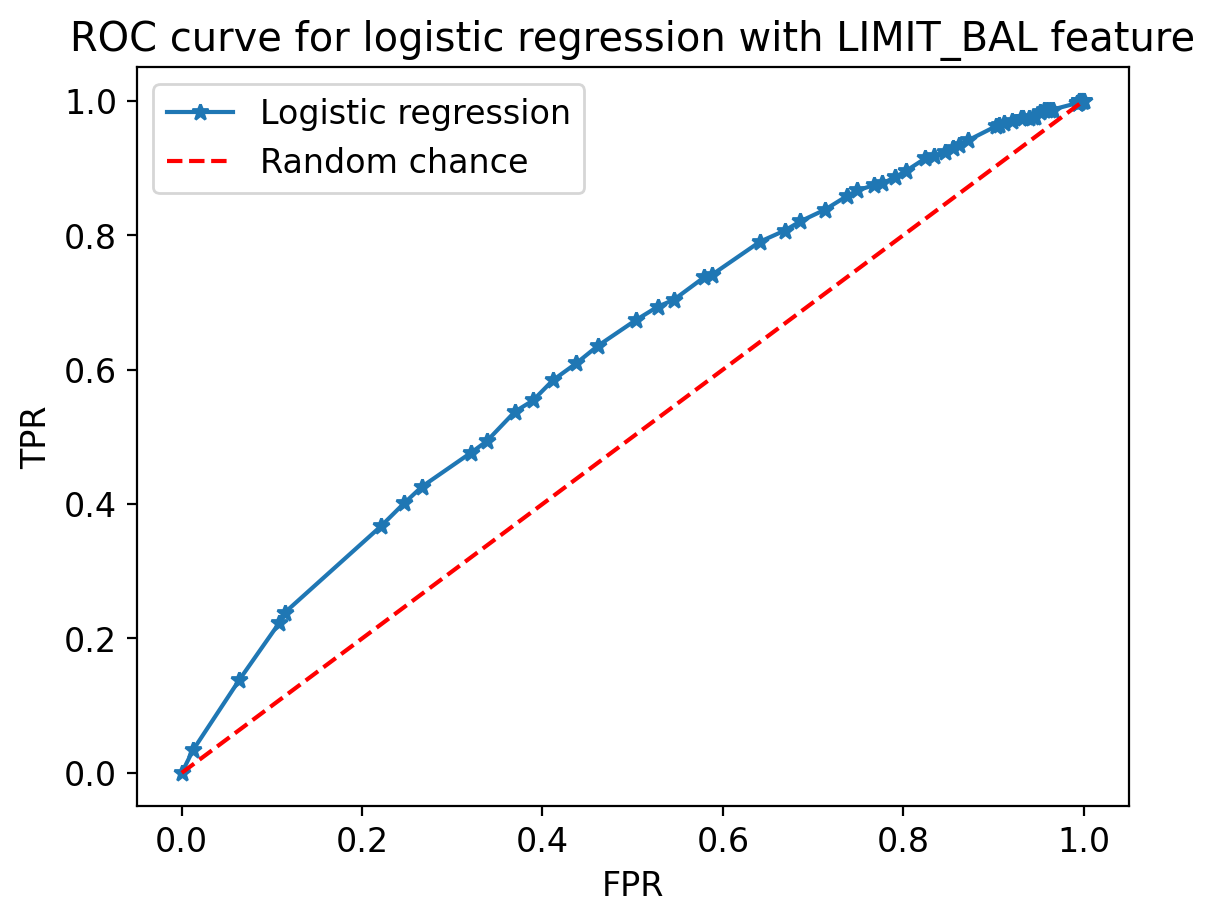

In [28]:
plt.plot(fpr_2, tpr_2, '*-')
plt.plot([0,1],[0,1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for logistic regression with LIMIT_BAL feature');

In [29]:
precision, recall, thresh_3 = \
metrics.precision_recall_curve(y_test_2, y_test_2_pred_proba[:,1])

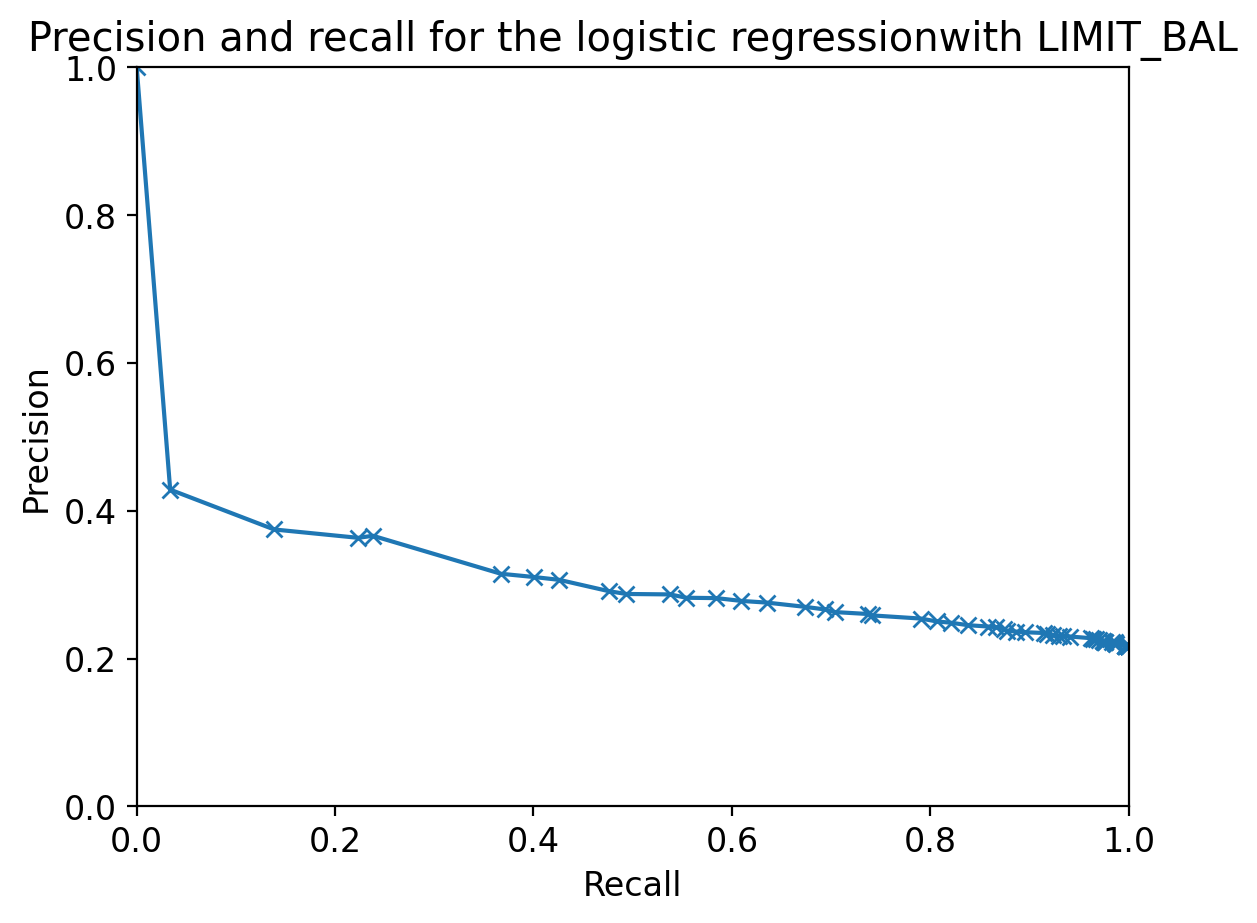

In [30]:
plt.plot(recall, precision, '-x')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision and recall for the logistic regression'
         + 'with LIMIT_BAL')
plt.xlim([0,1])
plt.ylim([0,1]);

In [31]:
metrics.auc(recall, precision)

0.31566964427378624

In [32]:
y_train_2_pred_proba = example_lr.predict_proba(X_train_2)

In [33]:
metrics.roc_auc_score(y_train_2, y_train_2_pred_proba[:,1])

0.6182918113358344